In [1]:
import pandas as pd

In [2]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [4]:

df = pd.read_excel('Data Analyst Assignment (1).xlsx')

In [5]:
df

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16829,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,25-34,19.88,36,15,0.0
16830,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,35-44,1.64,11,1,0.0
16831,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,45-54,0.00,3,0,0.0
16832,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,65 or more,0.00,3,0,0.0


In [6]:
df['age'].unique()

array(['18-24', '25-34', '35-44', 'Undetermined', '45-54', '55-64',
       '65 or more'], dtype=object)

In [13]:
len(df['impressions'])

16834

#

In [14]:
maxi = 0
for i in range(len(df['impressions'])):
    if df['impressions'][i] > maxi:
        maxi=df['impressions'][i]


In [15]:
print(maxi)

67454


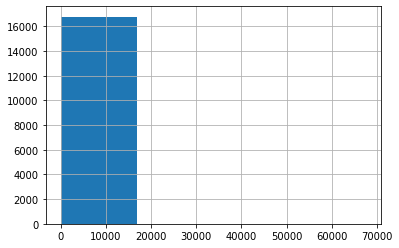

In [23]:
df['impressions'].hist(bins=4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46199d6ac8>,
      dtype=object)

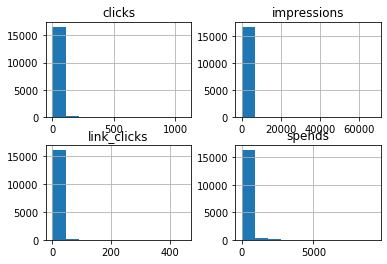

In [24]:
df.hist()

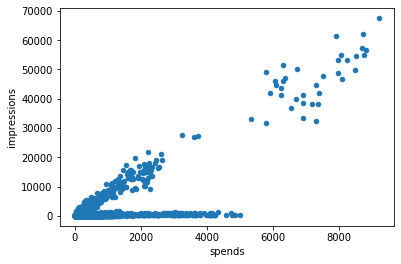

In [32]:
df.plot.scatter('spends','impressions') #should be used

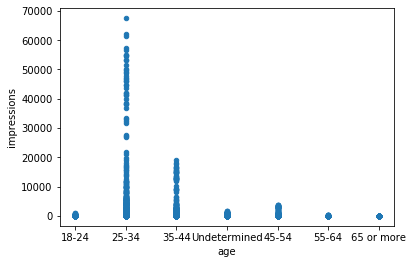

In [33]:
df.plot.scatter('age','impressions') #should be used

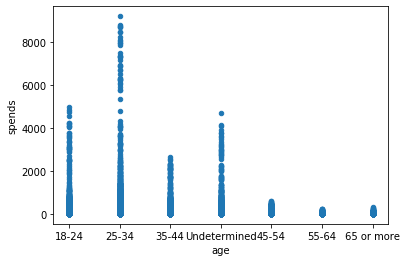

In [34]:
df.plot.scatter('age','spends')

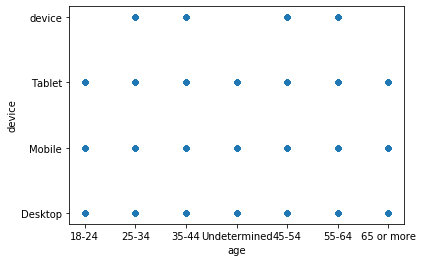

In [35]:
df.plot.scatter('age','device')#no effect

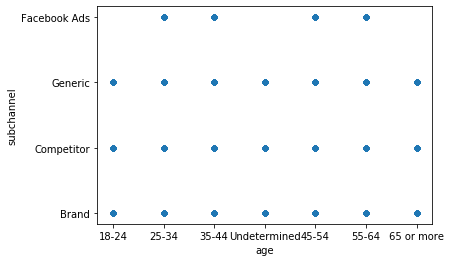

In [36]:
df.plot.scatter('age','subchannel')#no effect

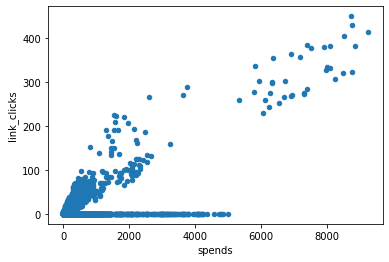

In [37]:
df.plot.scatter('spends','link_clicks')

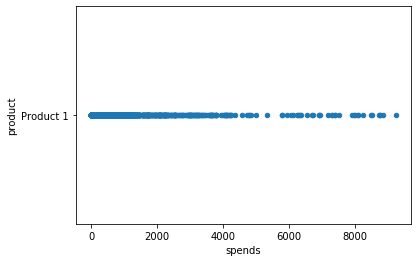

In [39]:
df.plot.scatter('spends','product')

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
import sklearn
train_data, test_data = sklearn.model_selection.train_test_split(df, train_size=0.8, test_size=0.2)

In [101]:
X = df[['impressions']].to_numpy()

In [102]:
Y = df[['spends']].to_numpy()

In [103]:
linear_regressor = LinearRegression()

In [104]:
linear_regressor.fit(X,Y)

LinearRegression()

In [105]:
X_test = test_data[['impressions']].to_numpy()

In [106]:
Y_pred = linear_regressor.predict(X)

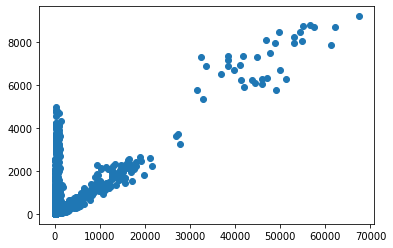

In [107]:
plt.scatter(X,Y)

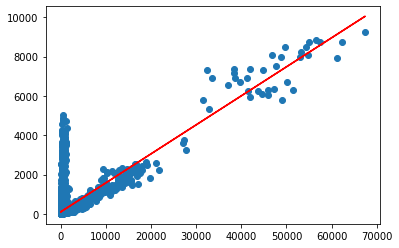

In [108]:
plt.scatter(X,Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [109]:
linear_regressor1 = LinearRegression()

In [110]:
X_train = train_data[['impressions']].to_numpy()
Y_train = train_data[['spends']].to_numpy()

In [111]:
linear_regressor1.fit(X_train,Y_train)

LinearRegression()

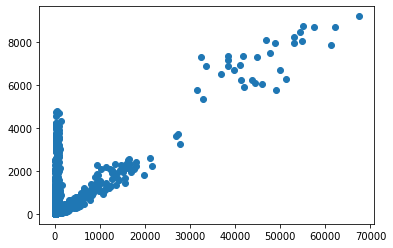

In [112]:
plt.scatter(X_train,Y_train)

In [117]:
X_tes = test_data[['impressions']].to_numpy()
Y_tes = test_data[['spends']].to_numpy()

In [118]:
Y_pre = linear_regressor1.predict(X_tes)

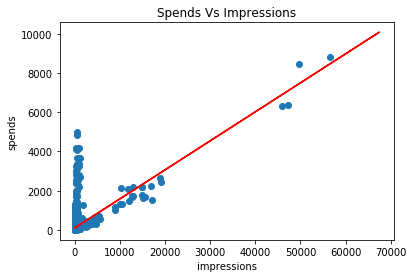

In [128]:
#checking the plot between test data and predicted data
plt.scatter(X_tes,Y_tes)
plt.plot(X_train, linear_regressor1.predict(X_train), color='red')
plt.title('Spends Vs Impressions')
plt.xlabel('impressions')
plt.ylabel('spends')
plt.show()

In [129]:
#now evaluating our model

In [130]:
from sklearn.metrics import mean_absolute_error

In [131]:
mean_absolute_error(Y_tes, Y_pre)

148.58568349251203

In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
mean_squared_error(Y_tes, Y_pre)

116709.88952711831

In [137]:
from sklearn.metrics import r2_score
r2_score(Y_tes,Y_pre)

0.4334107489599405

In [ ]:
#from r2 score we can say that our model is not so perfect. For perfect models r2 score is 1 and for failure models r2 score is 0